In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
id = '1LAAjfIrvJplStONTpKB9uxiH-G1BGSTU'
print (id)

1LAAjfIrvJplStONTpKB9uxiH-G1BGSTU


In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Look at Data**

In [4]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('data.csv')  
df = pd.read_csv('data.csv')
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
# number of row and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
# check null data
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

# **Analysis of Customer Lifetime Value**

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

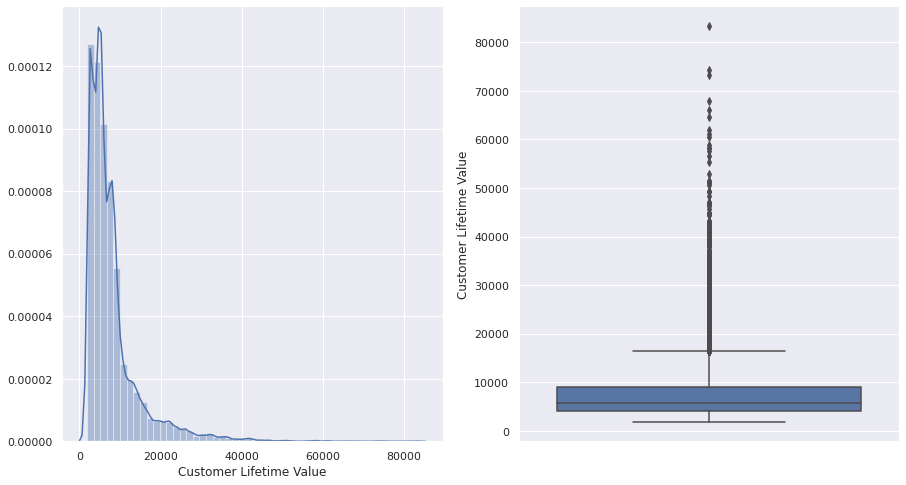

In [7]:
sns.set()
fig, axes = plt.subplots(1,2, figsize=(15,8),sharex=False)

sns.distplot(df['Customer Lifetime Value'],ax=axes[0])
sns.boxplot(y=df['Customer Lifetime Value'],ax=axes[1])
df['Customer Lifetime Value'].describe()

From chart above, we can use Q1 and Q3 as treshold for dividing CLV into three parts (Low, Medium, High). This dividing is useful for understanding the customer behaviour correlated to CLV.

Outlier (that has been removed):  817


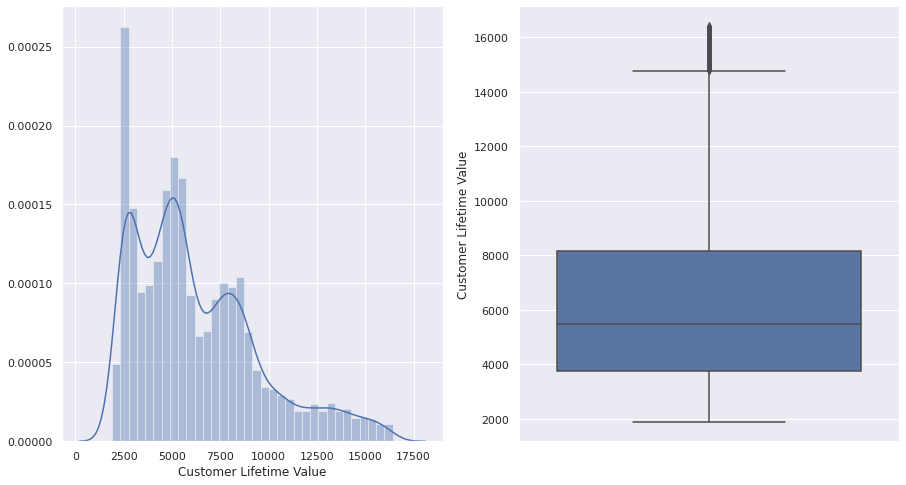

In [8]:
# remove outlier

q1 = np.percentile(df['Customer Lifetime Value'], 25)
q3 = np.percentile(df['Customer Lifetime Value'], 75)
iqr = q3 - q1

max = q3 + 1.5*iqr
min = q1- 1.5*iqr

def remove_outlier(row):
  if row['Customer Lifetime Value']<min or row['Customer Lifetime Value']>max:
    val = 'True'
  else:
    val = 'False'
  return val

df['Outlier'] = df.apply(remove_outlier, axis=1)
print('Outlier (that has been removed): ', len(df[df['Outlier']=='True'].index))

df = df[df['Outlier']=='False']

fig, axes = plt.subplots(1,2, figsize=(15,8),sharex=False)

sns.distplot(df['Customer Lifetime Value'],ax=axes[0])
sns.boxplot(y=df['Customer Lifetime Value'],ax=axes[1])


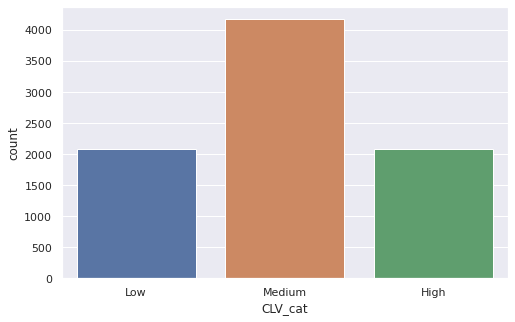

In [9]:
# grouped by quartile

q1 = np.percentile(df['Customer Lifetime Value'], 25)
q3 = np.percentile(df['Customer Lifetime Value'], 75)

def tiling(row):
  if row['Customer Lifetime Value'] < q1:
    val = 'Low'
  elif row['Customer Lifetime Value'] > q3:
    val = 'High'
  else:
    val = 'Medium'
  return val

df['CLV_cat'] = df.apply(tiling, axis=1)

plt.figure(figsize=(8,5))
sns.countplot(df['CLV_cat'], order=['Low','Medium', 'High'])

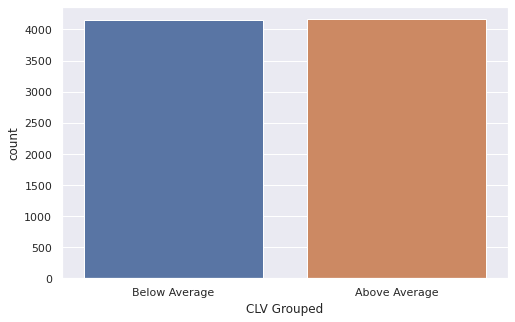

In [10]:
# grouped by mean

mean = np.median(df['Customer Lifetime Value'])

def grouped(row):
  if row['Customer Lifetime Value'] < mean:
    val = 'Below Average'
  else:
    val = 'Above Average'
  return val

df['CLV Grouped'] = df.apply(grouped, axis=1)

plt.figure(figsize=(8,5))
sns.countplot(df['CLV Grouped'])

# **Analysis of Numerical Variable**

In [11]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,8317.000000,8317.000000,8317.000000,8317.000000,8317.000000,8317.000000,8317.000000,8317.000000
mean,6279.177892,37638.476855,90.949621,15.034387,48.063124,0.393171,3.037994,423.041312
std,3240.426385,30415.335684,31.047412,10.038850,27.920250,0.927140,2.470996,275.674499
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3746.751625,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,268.471802
50%,5470.060561,33837.000000,81.000000,14.000000,48.000000,0.000000,2.000000,374.400000
75%,8162.617053,62229.000000,107.000000,23.000000,71.000000,0.000000,4.000000,542.400000
max,16407.664610,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


### 1. Income

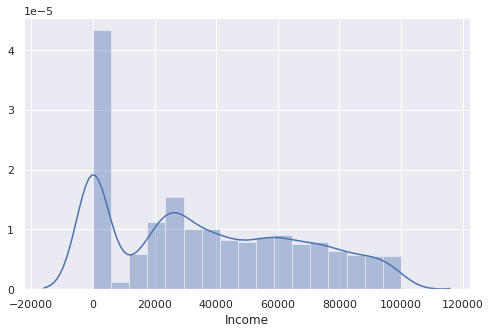

In [12]:
plt.figure(figsize=(8,5))
sns.distplot(df['Income'])

Since there are 0 values in income that make the distribution has two peaks, we can remove the data that have 0 in income.

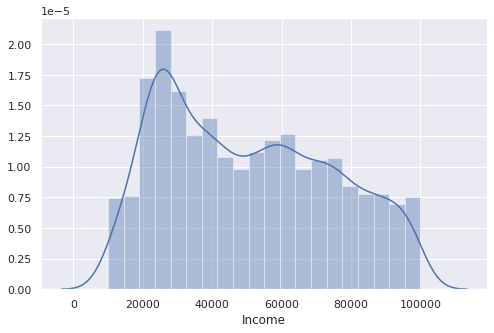

In [13]:
df = df[df['Income']>0]

plt.figure(figsize=(8,5))
sns.distplot(df['Income'])

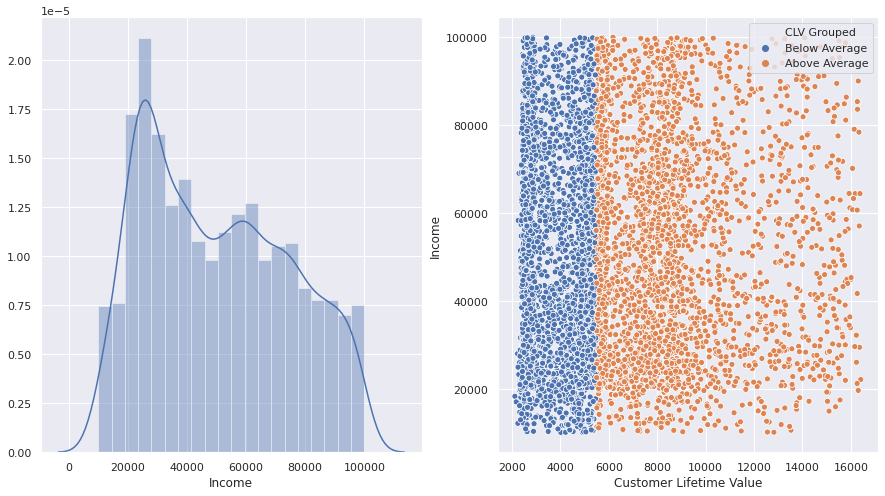

In [14]:
fig, axes = plt.subplots(1,2, figsize=(15,8),sharex=False)
sns.distplot(df['Income'],ax=axes[0])
sns.scatterplot(df['Customer Lifetime Value'], df['Income'],  hue=df['CLV Grouped'], ax=axes[1])

## 2. Monthly Premium Auto

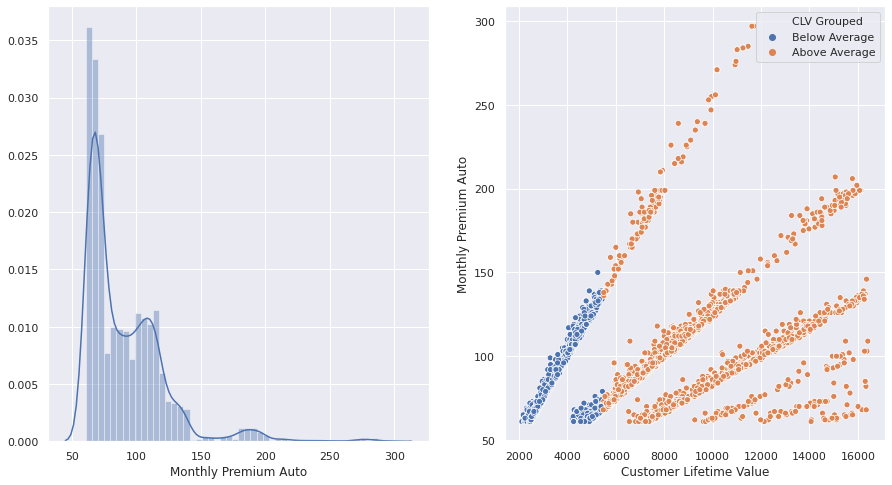

In [15]:
fig, axes = plt.subplots(1,2, figsize=(15,8),sharex=False)
sns.distplot(df['Monthly Premium Auto'],ax=axes[0])
sns.scatterplot(df['Customer Lifetime Value'], df['Monthly Premium Auto'],  hue=df['CLV Grouped'])

## 3. Total Claim Amount

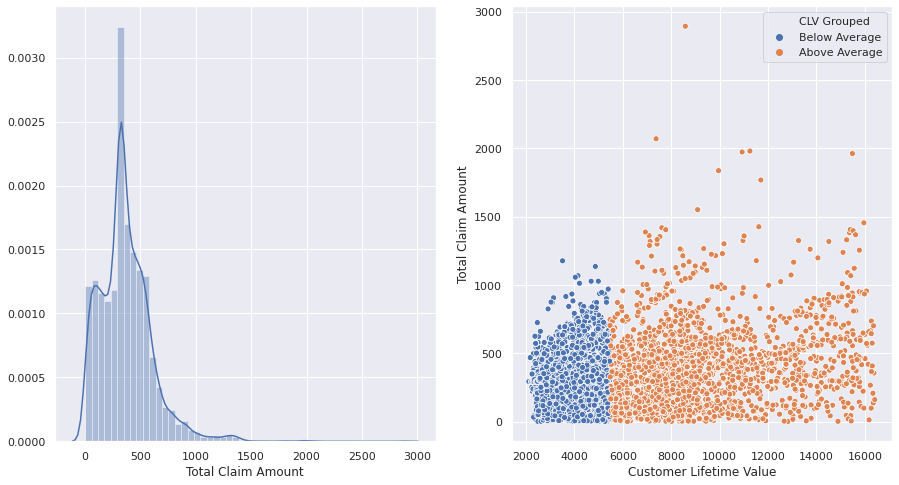

In [16]:
fig, axes = plt.subplots(1,2, figsize=(15,8),sharex=False)
sns.distplot(df['Total Claim Amount'],ax=axes[0])
sns.scatterplot(df['Customer Lifetime Value'], df['Total Claim Amount'],  hue=df['CLV Grouped'])

## 3. Other Numerical Variable

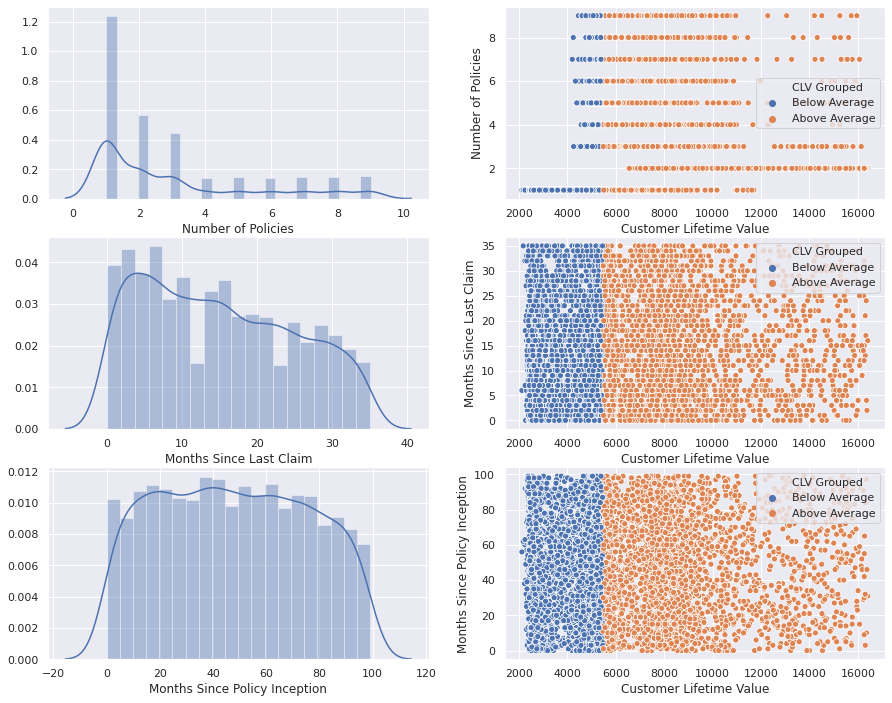

In [17]:
fig, axes = plt.subplots(3,2, figsize=(15,12),sharex=False)

sns.distplot(df['Number of Policies'],ax=axes[0,0])
sns.scatterplot(df['Customer Lifetime Value'], df['Number of Policies'],  hue=df['CLV Grouped'], ax=axes[0,1])
sns.distplot(df['Months Since Last Claim'],ax=axes[1,0])
sns.scatterplot(df['Customer Lifetime Value'], df['Months Since Last Claim'],  hue=df['CLV Grouped'], ax=axes[1,1])
sns.distplot(df['Months Since Policy Inception'],ax=axes[2,0])
sns.scatterplot(df['Customer Lifetime Value'], df['Months Since Policy Inception'],  hue=df['CLV Grouped'], ax=axes[2,1])

From statistics above, we cannot conclude any correlation between numerical variables with Customer Lifetime Value. But overall, we can view the correlation between one variable to another variable with the heatmap below.

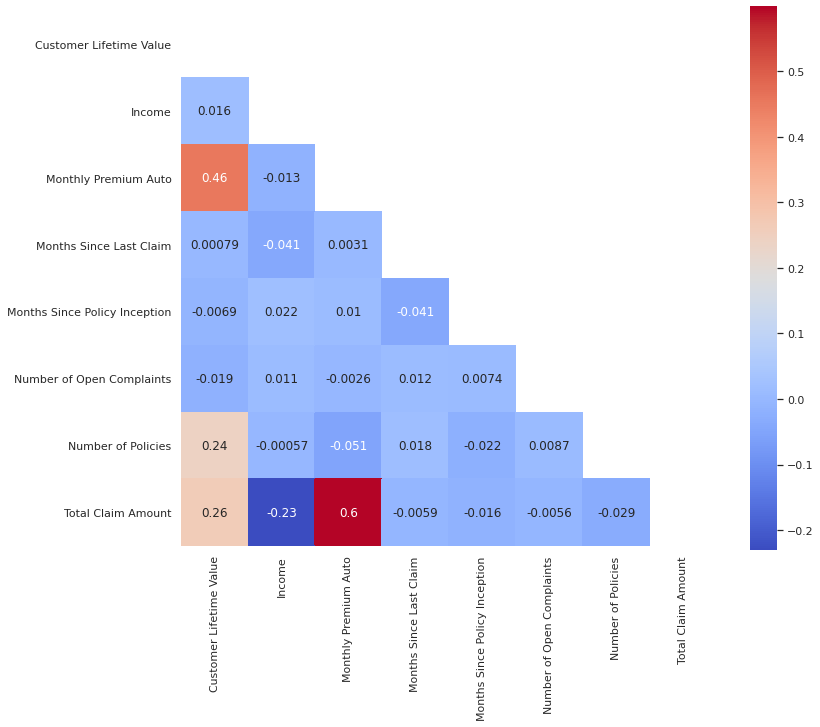

In [18]:
df1 = df.select_dtypes(include=[np.number])
num_var = list(df1.columns.values)

mask = np.zeros_like(df1.corr(method='pearson'))
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 10))
    ax = sns.heatmap(df1.corr(method='pearson'), cmap = 'coolwarm', annot = True, mask=mask, square=True)

There are several correlations that have significant value:

# **Analysis of Categorical Variable**

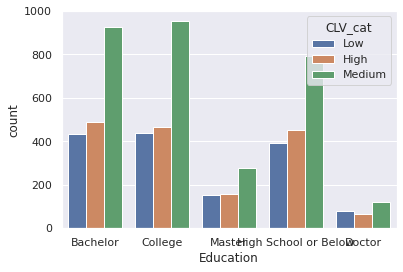

In [19]:
sns.countplot(df['Education'], hue=df['CLV_cat'])

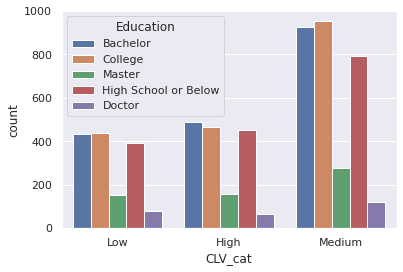

In [20]:
sns.countplot(df['CLV_cat'], hue=df['Education'])

In [21]:
df2 = df.select_dtypes(exclude=[np.number])
cat_var = list(df2.columns.values)
print('cat_var : ', len(cat_var),'\n')

df_cat = pd.DataFrame(columns=['Var','Total','Element','Unique'])
for i in cat_var:
  df_cat = df_cat.append({'Var':i,'Total':df[i].count(),'Element':df[i].unique(),'Unique':len(list(df[i].unique()))},ignore_index=True)

df_cat

cat_var :  19 



,Var,Total,Element,Unique
0,Customer,6201,"[BU79786, AI49188, HB64268, OC83172, XZ87318, ...",6201
1,State,6201,"[Washington, Nevada, Oregon, California, Arizona]",5
2,Response,6201,"[No, Yes]",2
3,Coverage,6201,"[Basic, Premium, Extended]",3
4,Education,6201,"[Bachelor, College, Master, High School or Bel...",5
5,Effective To Date,6201,"[2/24/11, 2/19/11, 2/3/11, 1/25/11, 2/17/11, 2...",59
6,EmploymentStatus,6201,"[Employed, Medical Leave, Disabled, Retired]",4
7,Gender,6201,"[F, M]",2
8,Location Code,6201,"[Suburban, Rural, Urban]",3
9,Marital Status,6201,"[Married, Single, Divorced]",3


In [22]:
# remove unwanted category variable
cat_var.remove('Customer')
cat_var.remove('Effective To Date')

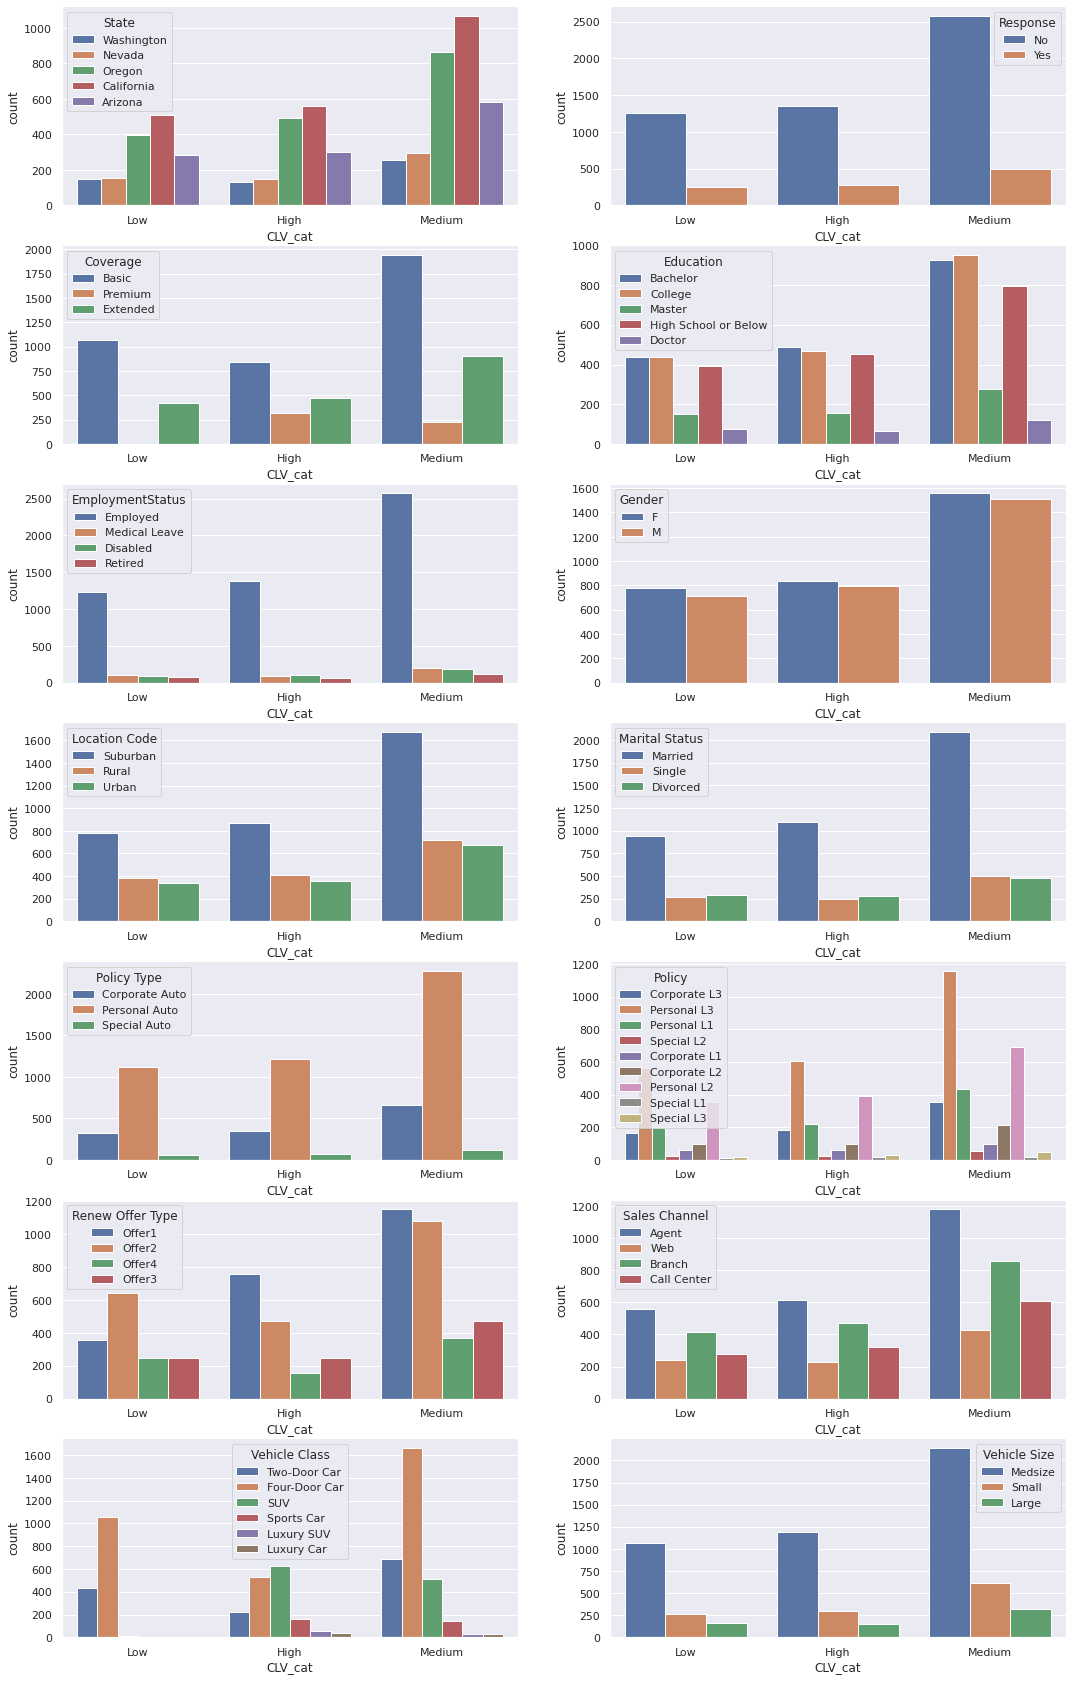

In [23]:
nrows = 7
ncols = 2
fig, axes = plt.subplots(nrows,ncols, figsize=(18,30),sharex=False)

i=0
for j in range(nrows):
  for k in range(ncols):
    sns.countplot(df['CLV_cat'],hue=df[cat_var[i]],
                  ax=axes[j,k])
    i+=1

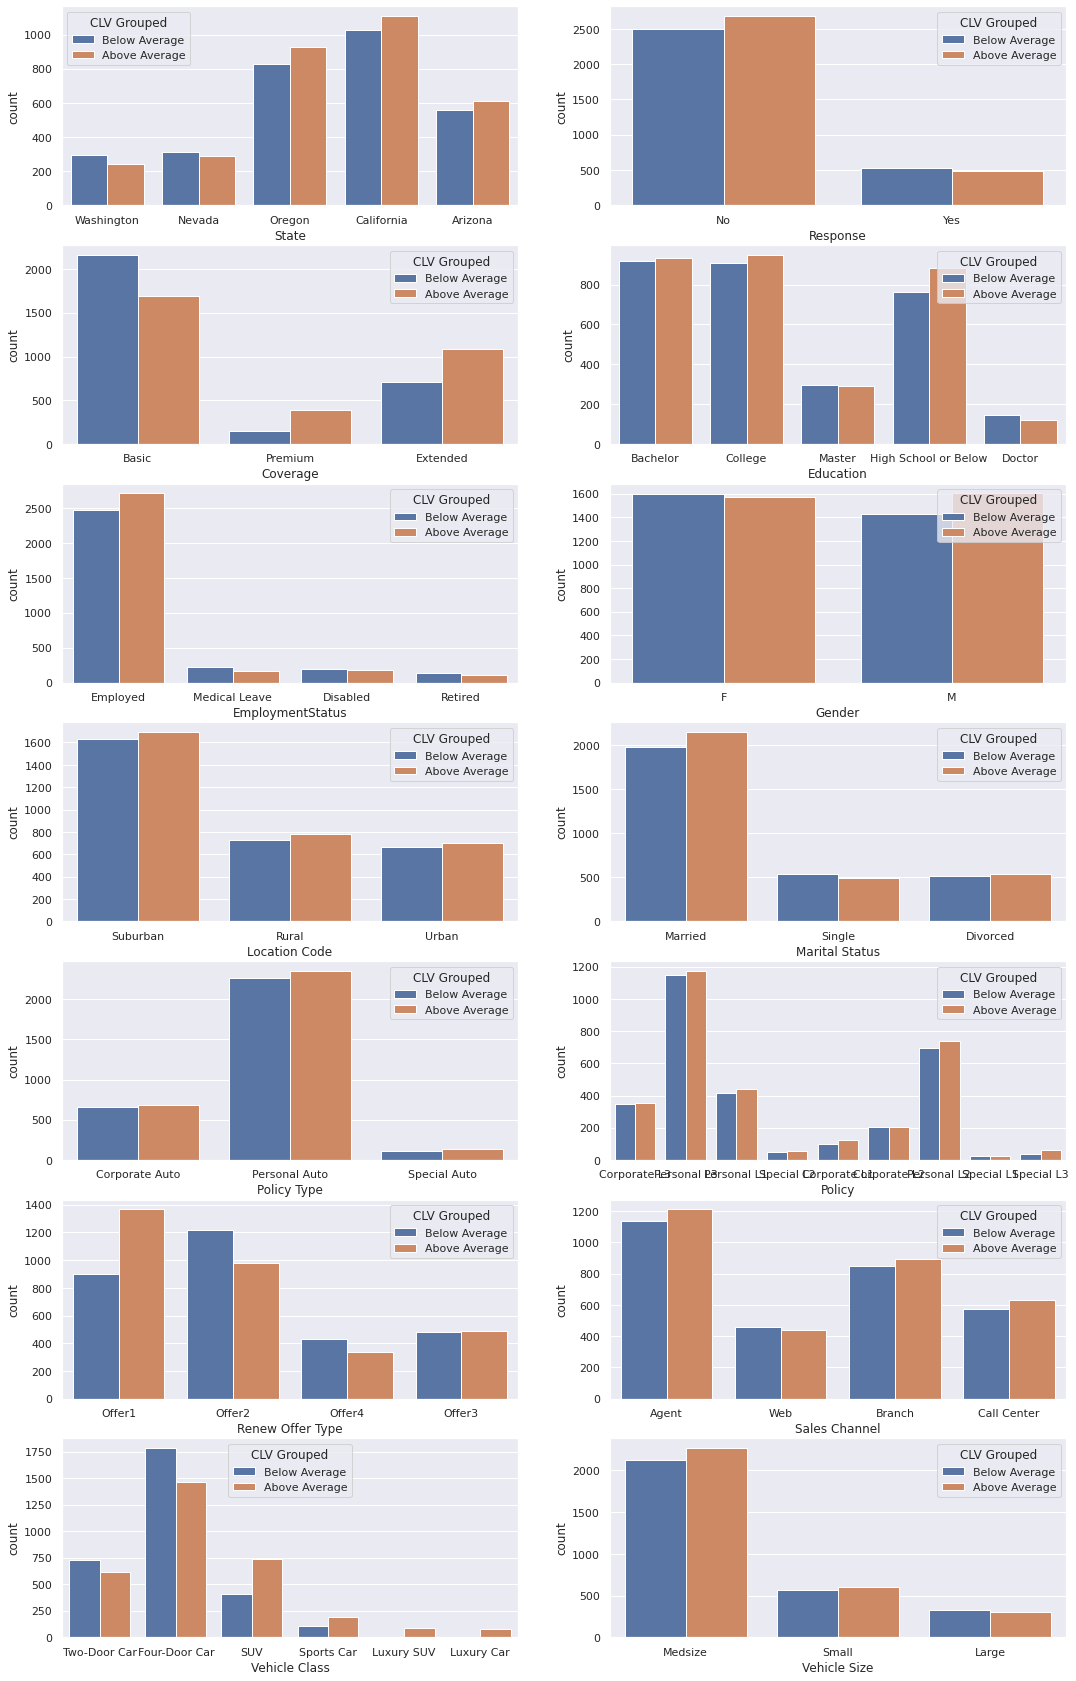

In [24]:
nrows = 7
ncols = 2
fig, axes = plt.subplots(nrows,ncols, figsize=(18,30),sharex=False)

i=0
for j in range(nrows):
  for k in range(ncols):
    sns.countplot(df[cat_var[i]], hue=df['CLV Grouped'],
                  ax=axes[j,k])
    i+=1